In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [14]:
faces.images.shape, faces.data.shape

((1348, 62, 47), (1348, 2914))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, train_size=0.7, random_state=)

<BarContainer object of 100 artists>

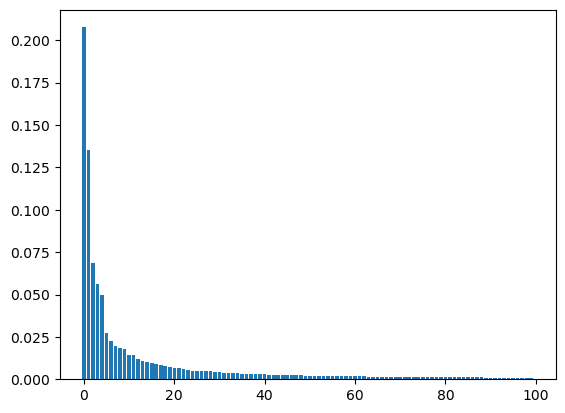

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.bar(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.725925925925926

In [50]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=SVC(), param_grid={'C': [1, 1150], 'kernel': ('linear', 'rbf')})
gs.fit(X_train_pca, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 1150], 'kernel': ('linear', 'rbf')})

In [51]:
gs.best_params_

{'C': 1150, 'kernel': 'rbf'}